In [1]:
import pandas as pd
import tensorflow as tf

In [22]:
df = pd.read_csv('../data/house-prices.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [23]:
df.shape

(21613, 21)

### Pré-processamento

In [29]:
X = df.iloc[:, 5].values
X.shape

(21613,)

In [30]:
# transformando em matriz
X = X.reshape(-1, 1) # -1 não mexe nas linhas, add uma coluna
X.shape

(21613, 1)

In [31]:
y = df.iloc[:, 2:3].values # elimina o uso do reshape
y.shape

(21613, 1)

#### Escalonamento

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)
X[:5]

/home/dstrb/anaconda3/envs/tensor/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/dstrb/anaconda3/envs/tensor/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.97983502],
       [ 0.53363434],
       [-1.42625404],
       [-0.13055006],
       [-0.43542158]])

In [34]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)
y[:5]

array([[-0.86671733],
       [-0.00568792],
       [-0.98084935],
       [ 0.17409044],
       [-0.08195753]])

### Gráfico

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

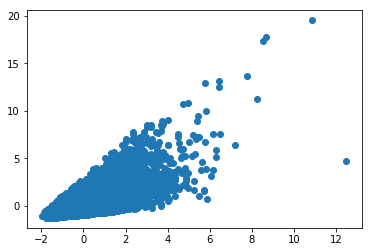

In [36]:
plt.scatter(X, y)

### Regressão
y = b0 + b1 * x

In [40]:
import numpy as np

In [44]:
np.random.seed(1)
np.random.rand(2)

array([0.417022  , 0.72032449])

In [45]:
b0 = tf.Variable(0.417022)
b1 = tf.Variable(0.720324)

In [46]:
batch_size = 32 # divide a quantidade de exemplos que será treinado por vez
xph = tf.placeholder(tf.float32, [batch_size, 1])
yph = tf.placeholder(tf.float32, [batch_size, 1])

In [47]:
y_modelo = b0 + b1 * xph
erro = tf.losses.mean_squared_error(yph, y_modelo)
otimizador = tf.train.GradientDescentOptimizer(learning_rate=0.001)
treinamento = otimizador.minimize(erro)
init = tf.global_variables_initializer()

In [54]:
np.random.randint(len(X), size=batch_size)

array([ 4074, 14792, 16926,  9287, 13699,  1478, 16277,  1337, 12803,
       11032,  8689,  1612, 19482,  1844,  9552,  2669,    15, 18628,
       12313, 11631, 13783, 10119,  1306,  9832,  1046, 14089, 16067,
       19431, 17534,  9495,  3428, 16539])

In [55]:
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(10000):
        indices = np.random.randint(len(X), size=batch_size)
        feed = {xph: X[indices], yph: y[indices]}
        sess.run(treinamento, feed_dict=feed)
        
    b0_final, b1_final = sess.run([b0, b1])   
b0_final, b1_final

(-0.0023289057, 0.7068312)

### Predict

In [60]:
previsoes = b0_final + b1_final * X
previsoes

array([[-0.69490689],
       [ 0.3748605 ],
       [-1.01044979],
       ...,
       [-0.81804558],
       [-0.37166782],
       [-0.81804558]])

#### Gráfico 1.1

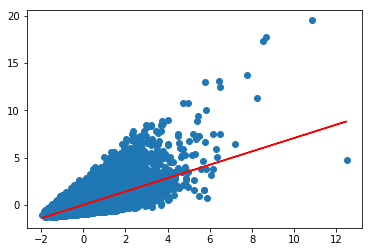

In [63]:
plt.plot(X, y, 'o')
plt.plot(X, previsoes, color='red')

### Métricas

In [67]:
from sklearn.metrics import mean_absolute_error

In [64]:
y1 = scaler_y.inverse_transform(y)
previsoes1 = scaler_y.inverse_transform(previsoes)

In [69]:
mean_absolute_error(y1, previsoes1) # resultado não muito bom

173898.89733691275